# **Starting**

https://gist.github.com/aldous-rey/68c6c43450517aa47474


http://www.cp.jku.at/research/papers/Arzt_etal_ISMIR_2012.pdf

In [ ]:
!unzip midi_files.zip
!mkdir new

In [ ]:
#converts all midi files in the current folder

import glob
import os
import music21

#converting everything into the key of C major or A minor

# major conversions
majors = dict([("A-", 4),("A", 3),("B-", 2),("B", 1),("C", 0),("D-", -1),("D", -2),("E-", -3),("E", -4),("F", -5),("G-", 6),("G", 5)])
minors = dict([("A-", 1),("A", 0),("B-", -1),("B", -2),("C", -3),("D-", -4),("D", -5),("E-", 6),("E", 5),("F", 4),("G-", 3),("G", 2)])


#os.chdir("./")
for file in glob.glob("/content/*.mid"):
    score = music21.converter.parse(file)
    key = score.analyze('key')
#    print key.tonic.name, key.mode
    if key.mode == "major":
        halfSteps = majors[key.tonic.name]
        
    elif key.mode == "minor":
        halfSteps = minors[key.tonic.name]
    
    newscore = score.transpose(halfSteps)
    key = newscore.analyze('key')
    print (key.tonic.name, key.mode)  
    newFileName = "new"+file[file.rindex('/'):]
    print(newFileName)
    newscore.write('midi',newFileName)

A minor
new/Sco_03_Dance_fl_cl.mid
A minor
new/target.mid


In [ ]:
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 13 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5x11extras5 amd64 5.9.5-0ubuntu1 [8,596 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic/uni

# **Original Midi**

In [ ]:
input1= "/content/midi_files/Sco_03_Dance_fl_cl.mid"
!fluidsynth -ni font.sf2 {input1} -F outputtt.wav -r 44100
from IPython.display import Audio
Audio('outputtt.wav')

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Parameter '/content/midi_files/Sco_03_Dance_fl_cl.mid' not a SoundFont or MIDI file or error occurred identifying it.
No midi file specified!


ValueError: ignored

# **Transpose MIDI**

In [ ]:
input= "/content/new/Sco_03_Dance_fl_cl.mid"
!fluidsynth -ni font.sf2 {input} -F output.wav -r 44100
from IPython.display import Audio
Audio('output.wav')

# **SLow DOwn Midi or fast**

In [ ]:
import music21
input= "/content/new/Sco_03_Dance_fl_cl.mid"
fctr = 0.1 # scale (in this case stretch) the overall tempo by this factor
score = music21.converter.parse(input)
newscore = score.scaleOffsets(fctr).scaleDurations(fctr)
newscore.write('midi','song_slow.mid') 

In [ ]:
input= "song_slow.mid"
!fluidsynth -ni font.sf2 {input} -F output22.wav -r 44100
from IPython.display import Audio
Audio('output22.wav')

In [ ]:
!pip install pretty_midi visual_midi

In [ ]:
from visual_midi import Preset
from pretty_midi import PrettyMIDI
from visual_midi import Plotter

plotter = Plotter()
preset = Preset(plot_width=850)
plotter = Plotter(preset, plot_max_length_bar=4)
pm = PrettyMIDI("song_slow.mid")
plotter.show_notebook(pm)

# **Bunch Together Fast SLow MIDI**

In [ ]:
import music21
!rm -rf /content/VariousTempo
!mkdir VariousTempo
foldername="VariousTempo/"
for file in glob.glob("/content/new/*.mid"):
    input= file
    t=0.1
    subfolder=foldername+file[file.rindex('/')+1:file.rindex('.')]
    print(subfolder)
    !mkdir {subfolder}
    while(t<=3.0):
        filename=foldername+file[file.rindex('/')+1:file.rindex('.')]+"/"+str(t)+file[file.rindex('/')+1:file.rindex('.')]+".mid"
        fctr = t # scale (in this case stretch) the overall tempo by this factor
        score = music21.converter.parse(input)
        newscore = score.scaleOffsets(fctr).scaleDurations(fctr)
        newscore.write('midi',filename)
        t=0.1+t



In [ ]:
!zip -r /content/file.zip /content/VariousTempo
from google.colab import files
files.download("/content/file.zip")

# **Experiment**

In [ ]:
path1= '/content/VariousTempo/Sco_43_Chorale_tpt_tpt_hn_tbn_tba/0.1Sco_43_Chorale_tpt_tpt_hn_tbn_tba.mid'
path2= '/content/VariousTempo/Sco_43_Chorale_tpt_tpt_hn_tbn_tba/0.2Sco_43_Chorale_tpt_tpt_hn_tbn_tba.mid'
# path3='/content/VariousTempo/Sco_01_Jupiter_vn_vc/2.9000000000000012Sco_01_Jupiter_vn_vc.mid'

In [ ]:
import pretty_midi
# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI(path1)
print(midi_data.estimate_tempo())
midi_data = pretty_midi.PrettyMIDI(path2)
print(midi_data.estimate_tempo())
midi_data = pretty_midi.PrettyMIDI(path3)
print(midi_data.estimate_tempo())

In [ ]:
!pip install py_midicsv

In [ ]:
import py_midicsv as pm

# Load the MIDI file and parse it into CSV format
csv_string1 = pm.midi_to_csv(path1)
csv_string2 = pm.midi_to_csv(path2)

# Parse the CSV output of the previous command back into a MIDI file
midi_object = pm.csv_to_midi(csv_string)

for i in range(len(csv_string1)):
    print(csv_string1[i]+""+csv_string2[i])


1. Make a table (Time Vs KeyPress)

2.  Getting the tempo - 
compare using DTW and get the time 

In [ ]:
import py_midicsv as pm
import pandas as pd

path1='/content/Sco_03_Dance_fl_cl.mid'
path2='/content/Sco_03_Dance_fl_cl.csv'

csv_string1 = pm.midi_to_csv(path1)
content = [x.strip().split(', ') for x in csv_string1] 
data=pd.DataFrame(content)
data=data[15:]
data.columns=['A','B','C','D','E','F','G']

In [ ]:
firstPerson = data.loc[data['D'] == '0']
onsetlist1 = firstPerson.loc[data['C'] == 'Note_on_c']
offsetlist1 = firstPerson.loc[data['C'] == 'Note_off_c']
print (onsetlist1)

     A       B          C  D   E    F     G
15   2     960  Note_on_c  0  74   67  None
17   2    2880  Note_on_c  0  76   66  None
19   2    4800  Note_on_c  0  77   67  None
21   2    6720  Note_on_c  0  73   72  None
23   2    8640  Note_on_c  0  74   72  None
..  ..     ...        ... ..  ..  ...   ...
513  2  181440  Note_on_c  0  69   76  None
515  2  181748  Note_on_c  0  73  110  None
517  2  181920  Note_on_c  0  76   83  None
519  2  182160  Note_on_c  0  81   87  None
521  2  182400  Note_on_c  0  74   84  None

[254 rows x 7 columns]


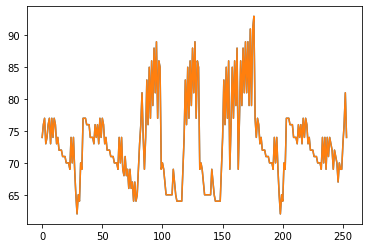

In [ ]:
onset1 = list(map(int, list(onsetlist1['E'])))
offset1= list(map(int, list(offsetlist1['E'])))
import matplotlib.pyplot as plt
plt.plot(onset1)
plt.plot(offset1)

In [ ]:
secondPerson = data.loc[data['D'] == '1']
onsetlist2 =  secondPerson.loc[data['C'] == 'Note_on_c']
offsetlist2 = secondPerson.loc[data['C'] == 'Note_off_c']
print (onsetlist2)

     A       B          C  D   E   F     G
531  3       0  Note_on_c  1  50  44  None
533  3     960  Note_on_c  1  65  64  None
535  3    1920  Note_on_c  1  50  46  None
537  3    2880  Note_on_c  1  67  64  None
539  3    3840  Note_on_c  1  50  45  None
..  ..     ...        ... ..  ..  ..   ...
909  3  177600  Note_on_c  1  72  83  None
911  3  179520  Note_on_c  1  53  49  None
913  3  180480  Note_on_c  1  57  52  None
915  3  181440  Note_on_c  1  57  63  None
917  3  182400  Note_on_c  1  50  56  None

[194 rows x 7 columns]


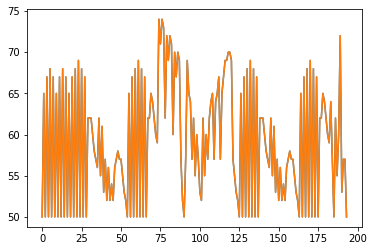

In [ ]:
onset2 = list(map(int, list(onsetlist2['E'])))
offset2= list(map(int, list(offsetlist2['E'])))
import matplotlib.pyplot as plt
plt.plot(onset2)
plt.plot(offset2)

# **Next Experiment with Target and New Source**

## **Step 1** 

Transpose the the Source and the target to C Major or A Minor so that if the musician changes the octave, still we can predict

In [9]:
!rm -rf new
!mkdir new
#converts all midi files in the current folder

import glob
import os
import music21

#converting everything into the key of C major or A minor

# major conversions
majors = dict([("A-", 4),("A", 3),("B-", 2),("B", 1),("C", 0),("D-", -1),("D", -2),("E-", -3),("E", -4),("F", -5),("G-", 6),("G", 5)])
minors = dict([("A-", 1),("A", 0),("B-", -1),("B", -2),("C", -3),("D-", -4),("D", -5),("E-", 6),("E", 5),("F", 4),("G-", 3),("G", 2)])


#os.chdir("./")
for file in glob.glob("/content/*.mid"):
    score = music21.converter.parse(file)
    key = score.analyze('key')
#    print key.tonic.name, key.mode
    if key.mode == "major":
        halfSteps = majors[key.tonic.name]
        
    elif key.mode == "minor":
        halfSteps = minors[key.tonic.name]
    
    newscore = score.transpose(halfSteps)
    key = newscore.analyze('key')
    print (key.tonic.name, key.mode)  
    newFileName = "new"+file[file.rindex('/'):]
    print(newFileName)
    newscore.write('midi',newFileName)

A minor
new/targetC.mid
C major
new/target3W.mid
A minor
new/targetW.mid
C major
new/target2W.mid
C major
new/target2C.mid


## **Step 2**

Parsing the database(total) and target midi for processing 

In [40]:
import py_midicsv as pm
import pandas as pd
import numpy as np

path1='/content/Sco_03_Dance_fl_cl.mid'
path2='/content/target.mid'

csv_string1 = pm.midi_to_csv(path1)
content = [x.strip().split(', ') for x in csv_string1] 
data=pd.DataFrame(content)
data=data[15:-2]
data.to_csv('sample.csv')

data.columns=['A','B','C','D','E','F','G']
total=list(data['E'])

In [41]:
csv_string2 = pm.midi_to_csv(path2)
content2 = [x.strip().split(', ') for x in csv_string2] 
target=pd.DataFrame(content2)
target=target[15:-2]

target.columns=['A','B','C','D','E','F','G']
tar=list(target['E'])
tar

['69',
 '69',
 '77',
 '77',
 '86',
 '86',
 '79',
 '79',
 '88',
 '88',
 '81',
 '81',
 '89',
 '89',
 '81',
 '81']

**To introduce error in the keypresses**

Run to check the capability

In [ ]:
#   tar=['74', '84', '83', '76', '45', '84', '84', '76', '76']   # Putting some error

In [50]:
tar= ['69',
 '69',
 '77',
 '77',
 '84',
 '86',
 '79',
 '79',
 '88',
 '88',
 '81',
 '87',
 '89',
 '89',
 '81',
 '84']

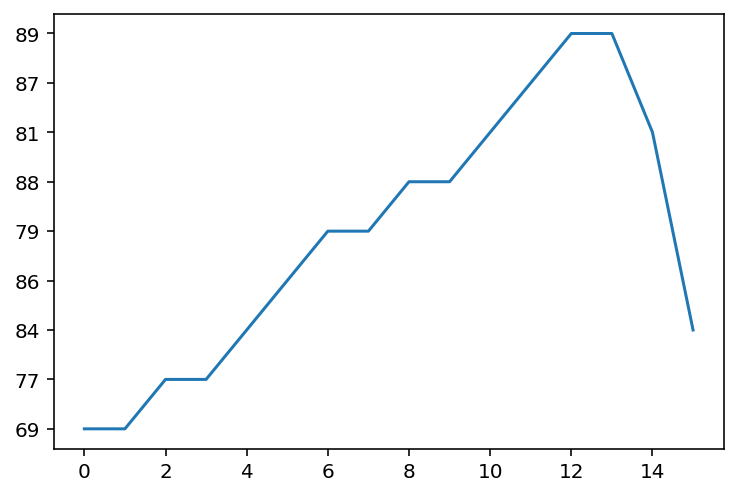

In [51]:
plt.plot(tar)

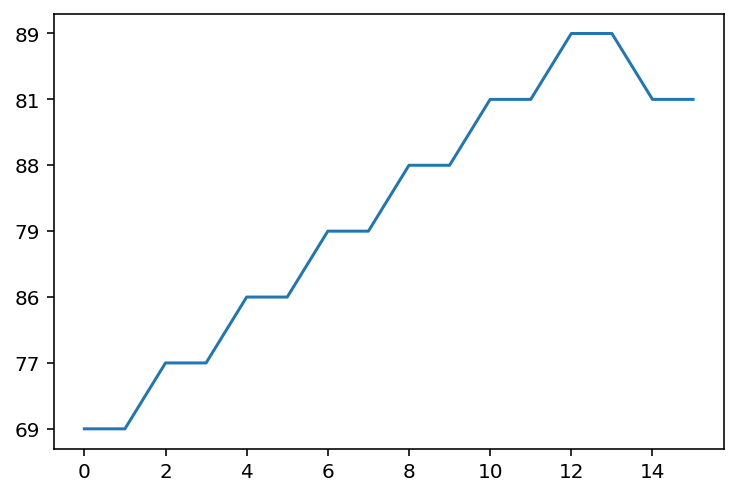

In [52]:
plt.plot(total[326:342])

# **Simple List matching if they are exactly same**

In [46]:
def find_sub_list(sl,l):
    results=[]
    sll=len(sl)
    for ind in (i for i,e in enumerate(l) if e==sl[0]):
        if l[ind:ind+sll]==sl:
            results.append((ind,ind+sll-1))

    return results

print (find_sub_list(tar, total) )


[(326, 341)]


In [ ]:
data.iloc[334+1]

A            1
B       126464
C    Note_on_c
D            0
E           84
F          127
G         None
Name: 350, dtype: object

# **Levenshtein Distance**

In [44]:
!pip install python-Levenshtein

time = 120000


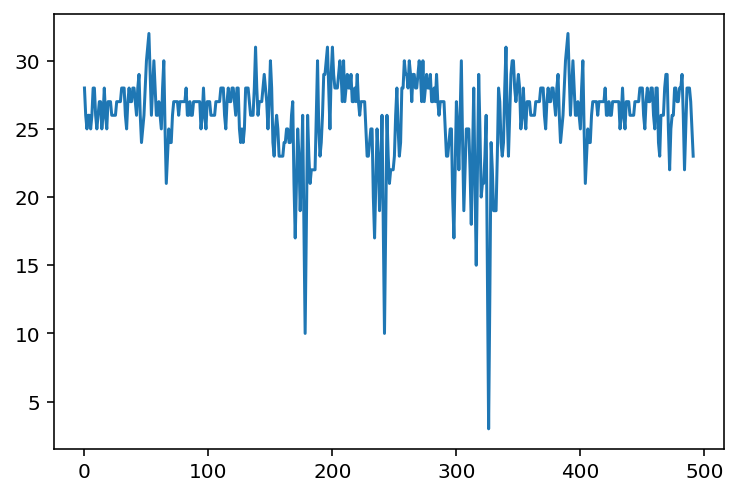

In [53]:
import Levenshtein
k=[]
for i in range(len(total)-len(tar)):
    k.append(Levenshtein.distance(str(tar),str(total[i:i+len(tar)])))
plt.plot(k)
block=k.index(min(k))
print("time =", data['B'].iloc[block+1])

# **Full MIDI Search**

In [1]:
!pip install py_midicsv
!pip install python-Levenshtein

In [12]:
!unzip data.zip
!unzip testing.zip

Archive:  data.zip
  inflating: data/Sco_01_Jupiter_vn_vc.mid  
  inflating: data/Sco_02_Sonata_vn_vn.mid  
  inflating: data/Sco_03_Dance_fl_cl.mid  
  inflating: data/Sco_04_Allegro_fl_fl.mid  
  inflating: data/Sco_05_Entertainer_tpt_tpt.mid  
  inflating: data/Sco_06_Entertainer_sax_sax.mid  
  inflating: data/Sco_07_GString_tpt_tbn.mid  
  inflating: data/Sco_08_Spring_fl_vn.mid  
  inflating: data/Sco_09_Jesus_tpt_vn.mid  
  inflating: data/Sco_10_March_tpt_sax.mid  
  inflating: data/Sco_11_Maria_ob_vc.mid  
  inflating: data/Sco_12_Spring_vn_vn_vc.mid  
  inflating: data/Sco_13_Hark_vn_vn_va.mid  
  inflating: data/Sco_14_Waltz_fl_fl_cl.mid  
  inflating: data/Sco_15_Surprise_tpt_tpt_tbn.mid  
  inflating: data/Sco_16_Surprise_tpt_tpt_sax.mid  
  inflating: data/Sco_17_Nocturne_vn_fl_cl.mid  
  inflating: data/Sco_18_Nocturne_vn_fl_tpt.mid  
  inflating: data/Sco_19_Pavane_cl_vn_vc.mid  
  inflating: data/Sco_20_Pavane_tpt_vn_vc.mid  
  inflating: data/Sco_21_Rejouissance_cl_tb

In [ ]:
def folder_Tranpose_database():
    !rm -rf dataFiles
    !mkdir dataFiles
    #converts all midi files in the current folder

    import glob
    import os
    import music21

    #converting everything into the key of C major or A minor

    # major conversions
    majors = dict([("A-", 4),("A", 3),("B-", 2),("B", 1),("C", 0),("D-", -1),("D", -2),("E-", -3),("E", -4),("F", -5),("G-", 6),("G", 5)])
    minors = dict([("A-", 1),("A", 0),("B-", -1),("B", -2),("C", -3),("D-", -4),("D", -5),("E-", 6),("E", 5),("F", 4),("G-", 3),("G", 2)])


    #os.chdir("./")
    for file in glob.glob("/content/data/*.mid"):
        score = music21.converter.parse(file)
        key = score.analyze('key')
    #    print key.tonic.name, key.mode
        if key.mode == "major":
            halfSteps = majors[key.tonic.name]
            
        elif key.mode == "minor":
            halfSteps = minors[key.tonic.name]
        
        newscore = score.transpose(halfSteps)
        key = newscore.analyze('key')
        print (key.tonic.name, key.mode)  
        newFileName = "dataFiles"+file[file.rindex('/'):]
        print(newFileName)
        newscore.write('midi',newFileName)



def folder_Tranpose_testing_files():
    !rm -rf testingFiles
    !mkdir testingFiles
    #converts all midi files in the current folder

    import glob
    import os
    import music21

    #converting everything into the key of C major or A minor

    # major conversions
    majors = dict([("A-", 4),("A", 3),("B-", 2),("B", 1),("C", 0),("D-", -1),("D", -2),("E-", -3),("E", -4),("F", -5),("G-", 6),("G", 5)])
    minors = dict([("A-", 1),("A", 0),("B-", -1),("B", -2),("C", -3),("D-", -4),("D", -5),("E-", 6),("E", 5),("F", 4),("G-", 3),("G", 2)])


    #os.chdir("./")
    for file in glob.glob("/content/testing/*.mid"):
        score = music21.converter.parse(file)
        key = score.analyze('key')
    #    print key.tonic.name, key.mode
        if key.mode == "major":
            halfSteps = majors[key.tonic.name]
            
        elif key.mode == "minor":
            halfSteps = minors[key.tonic.name]
        
        newscore = score.transpose(halfSteps)
        key = newscore.analyze('key')
        print (key.tonic.name, key.mode)  
        newFileName = "testingFiles"+file[file.rindex('/'):]
        print(newFileName)
        newscore.write('midi',newFileName)


folder_Tranpose_database()
folder_Tranpose_testing_files()

In [30]:
import py_midicsv as pm
import pandas as pd
import numpy as np
import glob
total=pd.DataFrame()
t=1
for file in glob.glob("/content/data/*.mid"):
    print(t,". ",file)
    csv_string1 = pm.midi_to_csv(file)
    content = [x.strip().split(', ') for x in csv_string1] 
    data=pd.DataFrame(content)
    data.columns=['A','Timestamp','NotePress','Track','Pitch','Velocity','G']
    y=pd.DataFrame([t] * data.shape[0])
    y.columns=['FileID']
    data=pd.concat([data,y],axis=1)
    total=total.append(data, ignore_index=True)
    t+=1
pitchData=list(total['Pitch'])

1 .  /content/data/Sco_16_Surprise_tpt_tpt_sax.mid
2 .  /content/data/Sco_05_Entertainer_tpt_tpt.mid
3 .  /content/data/Sco_24_Pirates_vn_vn_va_vc.mid
4 .  /content/data/Sco_12_Spring_vn_vn_vc.mid
5 .  /content/data/Sco_44_K515_vn_vn_va_va_vc.mid
6 .  /content/data/Sco_29_Fugue_fl_fl_ob_cl.mid
7 .  /content/data/Sco_15_Surprise_tpt_tpt_tbn.mid
8 .  /content/data/Sco_19_Pavane_cl_vn_vc.mid
9 .  /content/data/Sco_13_Hark_vn_vn_va.mid
10 .  /content/data/Sco_40_Miserere_fl_fl_ob_cl_bn.mid
11 .  /content/data/Sco_42_Arioso_tpt_tpt_hn_tbn_tba.mid
12 .  /content/data/Sco_31_Slavonic_tpt_tpt_hn_tbn.mid
13 .  /content/data/Sco_06_Entertainer_sax_sax.mid
14 .  /content/data/Sco_09_Jesus_tpt_vn.mid
15 .  /content/data/Sco_35_Rondeau_vn_vn_va_db.mid
16 .  /content/data/Sco_18_Nocturne_vn_fl_tpt.mid
17 .  /content/data/Sco_32_Fugue_vn_vn_va_vc.mid
18 .  /content/data/Sco_08_Spring_fl_vn.mid
19 .  /content/data/Sco_01_Jupiter_vn_vc.mid
20 .  /content/data/Sco_34_Fugue_tpt_tpt_hn_tbn.mid
21 .  /cont

**Get information for the target window**

In [36]:
path2= '/content/testing/target3W.mid'
csv_string2 = pm.midi_to_csv(path2)
content2 = [x.strip().split(', ') for x in csv_string2] 
target=pd.DataFrame(content2)
target.columns=['A','Timestamp','NotePress','Track','Pitch','Velocity','G']
target=target[15:-2]
a=list(target.Track.unique())
a=filter(None, a) # Remove nulls
target_Tracks = [ i for i in a if i.isnumeric() ]    # Calculates the number of tracks

**Distance function**

In [33]:

import Levenshtein
def distance(total,tar):
    k=[]
    for i in range(len(total)-len(tar)):
        k.append(Levenshtein.distance(str(tar),str(total[i:i+len(tar)])))
    # plt.plot(k)
    block=k.index(min(k))
    print("Minimum value= ",min(k))
    # print("time =", total['Timestamp'].iloc[block+1])
    return k,block

**Checking**

Minimum value=  0
6709


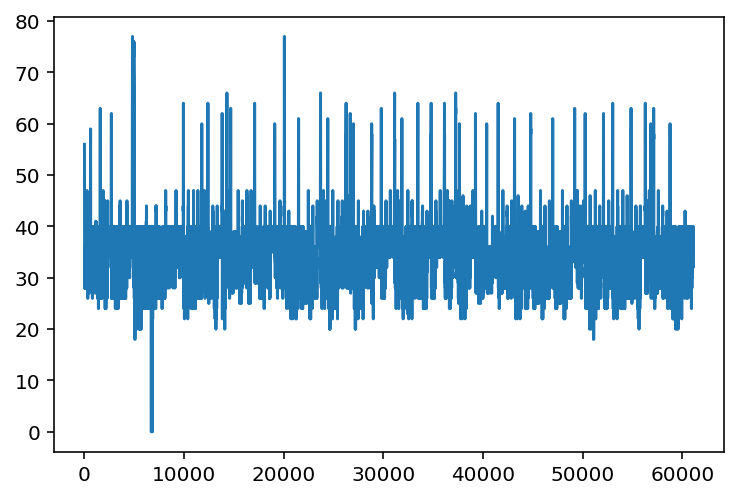

File id =  5
Timestamp =  327600
Track =  1
Minimum value=  10
32797


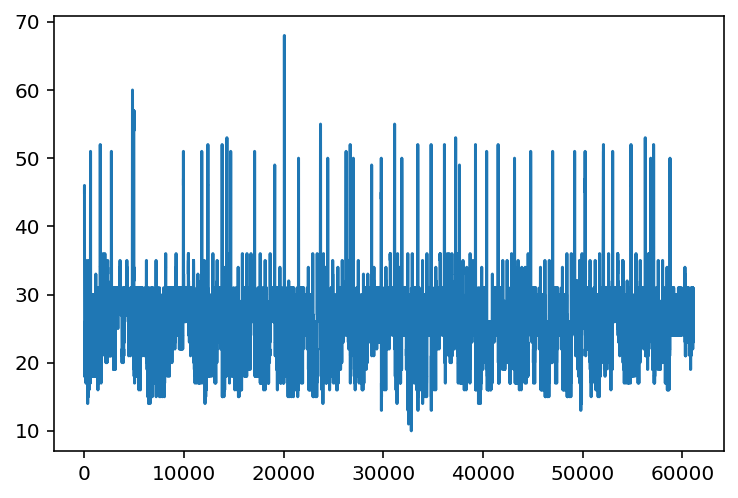

File id =  24
Timestamp =  240960
Track =  1
Minimum value=  11
1596


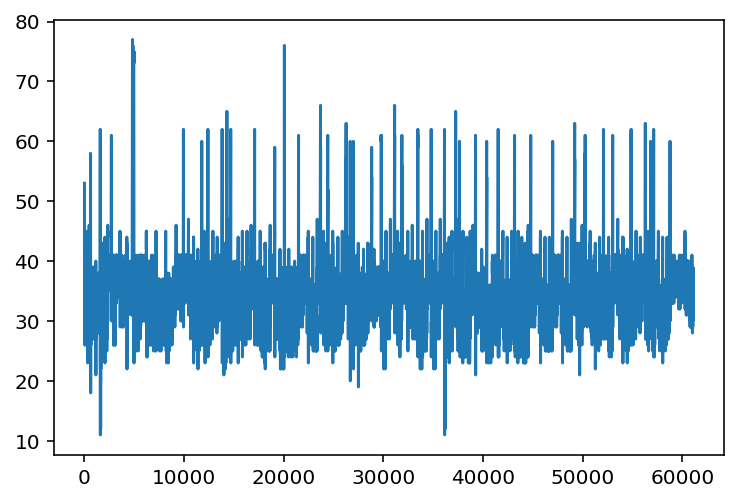

File id =  3
Timestamp =  0
Track =  0
Minimum value=  14
6456


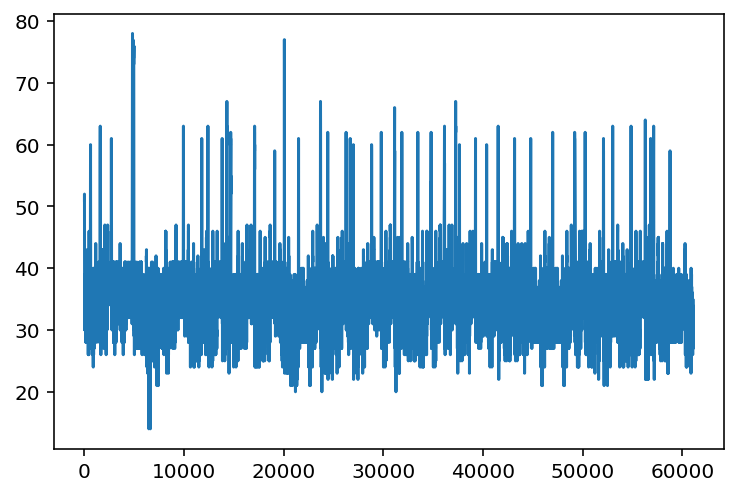

File id =  5
Timestamp =  135360
Track =  1


In [37]:
import matplotlib.pyplot as plt
timestamp_collector=[]
file_collector=[]
track_collector=[]

for i in target_Tracks:
    tar=target.loc[target['Track'] == i]
    data=list(tar['Pitch'])
    k,block=distance(pitchData,data[0:20])
    print(block)
    plt.plot(k)
    plt.show()
    print("File id = ",total['FileID'].iloc[block+1])
    file_collector.append(total['FileID'].iloc[block+1])
    print("Timestamp = ",total['Timestamp'].iloc[block+1])
    timestamp_collector.append(total['Timestamp'].iloc[block+1])
    print("Track = ",total['Track'].iloc[block+1])
    track_collector.append(total['Track'].iloc[block+1])

In [38]:
timestamp_collector,file_collector,track_collector

(['327600', '240960', '0', '135360'], [5, 24, 3, 5], ['1', '1', '0', '1'])

In [ ]:
For Wrong file
728
File id =  2
Timestamp =  107760  ------------
Track =  0
1014
File id =  2
Timestamp =  31680   ---------
Track =  1


For Correct file
728
File id =  2
Timestamp =  107760  -------------
Track =  0
1149
File id =  2
Timestamp =  102720   -------------
Track =  1

timestamp for correct file close
